In [2]:
import numpy as np
import pandas as pd
import polars as pl
import marshal, json
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
import matplotlib.patches as patches
from matplotlib import cm
import matplotlib
import json, math
from operator import sub
import scipy.stats
from IPython.display import set_matplotlib_formats
from IPython.display import Image
import matplotlib_inline.backend_inline


#matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
plt.rcParams.update({
    'font.family': 'serif',
    "font.serif": 'Times',
    'font.size': 12,
    'text.usetex': True,
    'pgf.rcfonts': False,
    'figure.dpi': 300,
    'savefig.dpi': 300,
    'text.latex.preamble': r'\usepackage{amsmath}'
})

v = 43
n = 100

In [3]:
def get_rdf_traffic_density(n,i,q):
    num_sent = 0
    num_fwd = 0

    A = n/12
    T = math.sqrt(A) * 1000 / 33.3
    AT = A * T

    num_runs = 10
    errors = 0
    for r in range(num_runs):
        try:
            with open(f'../res/v{v}_parsed/summary_kpi_rdf_n{n}_i{i}_q{q}_r{r}.json', 'rb') as f:
                data = json.load(f)
                num_sent += data['num_sent']
                num_fwd += data['num_fwd']
        except:
            errors += 1

    if errors == num_runs:
        return (0,0)
    return (num_sent / (num_runs - errors) / AT, num_fwd / (num_runs- errors) / AT)

def get_sf_traffic_density(n,i,p):
    num_sent = 0
    num_fwd = 0

    A = n/12
    T = math.sqrt(A) * 1000 / 33.3
    AT = A * T

    num_runs = 10
    errors = 0
    for r in range(num_runs):
        try:
            with open(f'../res/v{v}_parsed/summary_kpi_sf_n{n}_i{i}_p{p}_r{r}.json', 'rb') as f:
                data = json.load(f)
                num_sent += data['num_sent']
                num_fwd += data['num_fwd']
        except:
            errors += 1

    if errors == num_runs:
        return (0,0)
    return (num_sent / (num_runs - errors) / AT, num_fwd / (num_runs- errors) / AT)

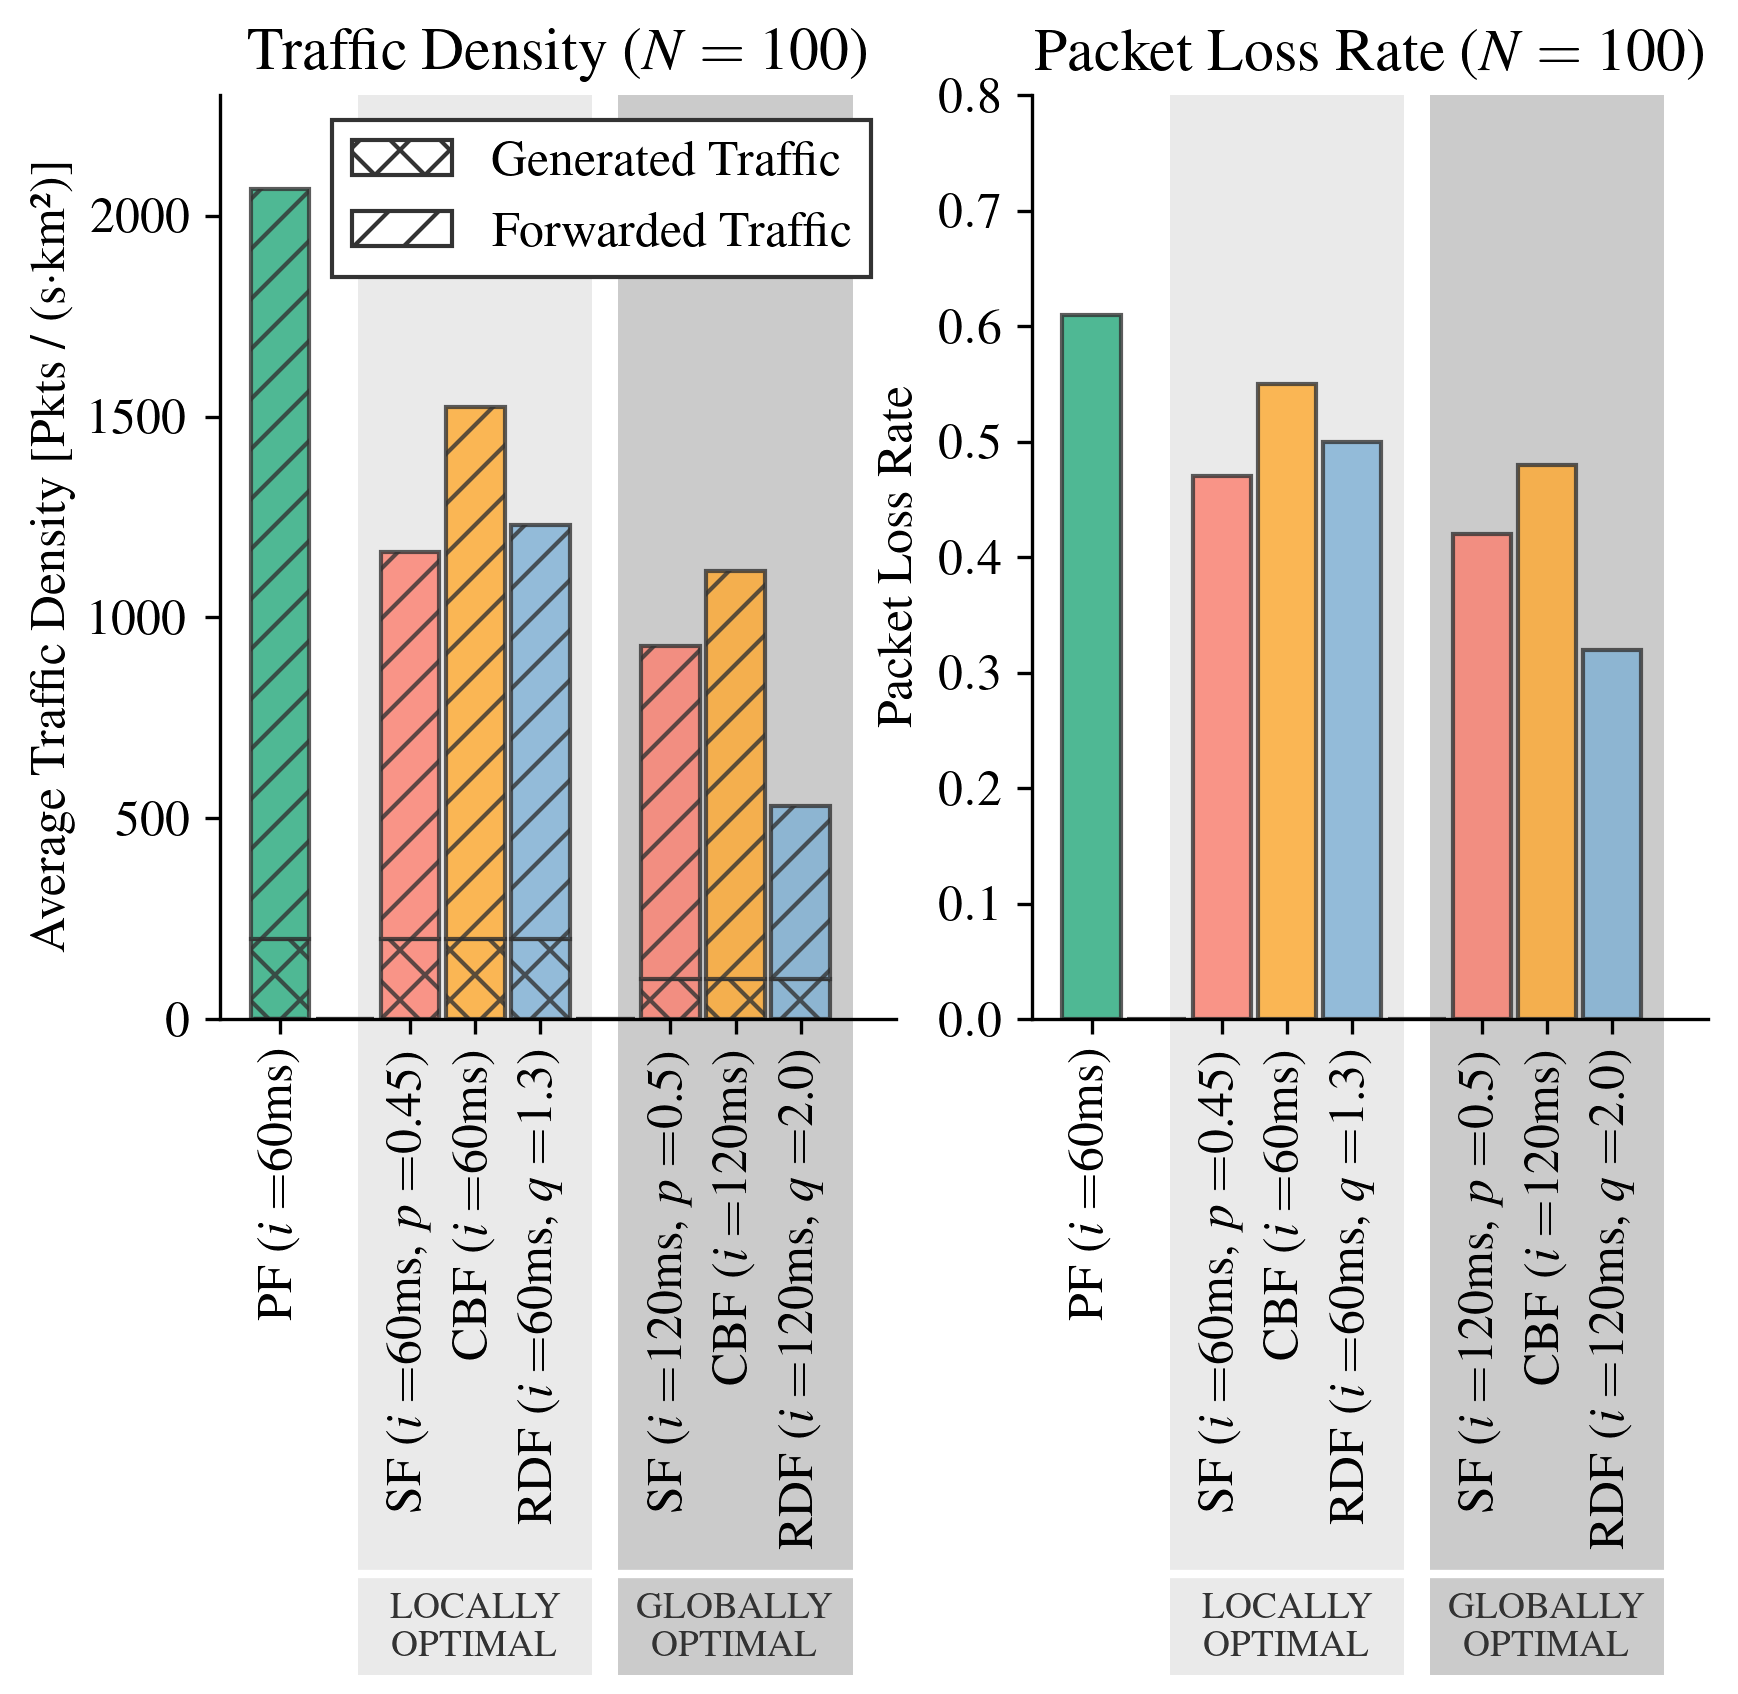

In [4]:
fig, axes = plt.subplots(ncols=2, figsize=(6.4, 4))
bar_width = 0.9
rdf_color = '#7eb0d5'
sf_color = '#fd7f6f'
pf_color = '#23a67a'
cbf_color = '#ffa92f'

ax1 = axes[0]
ax2 = axes[1]

ax1.spines.right.set_visible(False)
ax1.spines.top.set_visible(False)
ax1.set_ylabel('Average Traffic Density [Pkts / (s$\cdot$km²)]')
ax2.set_ylabel('Packet Loss Rate')

color = [pf_color, '#fff', sf_color, cbf_color, rdf_color, '#fff', sf_color, cbf_color, rdf_color]

configs = [0,1,2,3,4,5,6,7,8]
ticks = [0,2,3,4,6,7,8]
txd_sent = [
    get_sf_traffic_density(n, 60, 100)[0],
    0,
    get_sf_traffic_density(n, 60, 45)[0],
    get_rdf_traffic_density(n, 60, 0)[0],
    get_rdf_traffic_density(n, 60, 130)[0],
    0,
    get_sf_traffic_density(n, 120, 50)[0],
    get_rdf_traffic_density(n, 120, 0)[0],
    get_rdf_traffic_density(n, 120, 200)[0]
]

txd_forwarded = [
    get_sf_traffic_density(n, 60, 100)[1],
    0,
    get_sf_traffic_density(n, 60, 45)[1],
    get_rdf_traffic_density(n, 60, 0)[1],
    get_rdf_traffic_density(n, 60, 130)[1],
    0,
    get_sf_traffic_density(n, 120, 50)[1],
    get_rdf_traffic_density(n, 120, 0)[1],
    get_rdf_traffic_density(n, 120, 200)[1]
]

loss_rates = [
    0.61,
    0,
    0.47,
    0.55,
    0.50,
    0,
    0.42,
    0.48,
    0.32
]

ax1.set_xticks(ticks)
ax1.set_xticklabels([
    'PF ($i=$60ms)', 
    'SF ($i=$60ms, $p=$0.45)', 
    'CBF ($i=$60ms)', 
    'RDF ($i=$60ms, $q=$1.3)', ##
    'SF ($i=$120ms, $p=$0.5)', 
    'CBF ($i=$120ms)',  
    'RDF ($i=$120ms, $q=$2.0)'
    ], rotation="vertical")
# ax1.set_xlim([-1, 9])

max_txd = 2300
# bracket_height = 1600
# 
# ax1.plot([1.5, 4.5],[bracket_height,bracket_height], color='#333', lw=0.5)
ax1.fill_between([1.2, 4.8],[-max_txd * 0.71, -max_txd * 0.71],[max_txd,max_txd], clip_on=False, facecolor='#333', alpha = 0.1)
ax1.fill_between([5.2, 8.8],[-max_txd * 0.71, -max_txd * 0.71],[max_txd,max_txd], clip_on=False, facecolor='#333', alpha = 0.25)
ax1.text(7, -max_txd*0.62, 'GLOBALLY \nOPTIMAL', ha="center", va="top", color='#333', fontsize=9)
ax1.text(3, -max_txd*0.62, 'LOCALLY \nOPTIMAL', ha="center", va="top", color='#333', fontsize=9)
ax1.plot([0,9], [-max_txd*0.6,-max_txd*0.6], color= '#fff', clip_on=False, lw=2)

# bracket_height = 1300
# ax1.text(7, bracket_height +80, '$i=$120ms', ha="center", va="center")
# ax1.plot([5.5, 8.5],[bracket_height,bracket_height], color='#333', lw=0.5)
# curlyBrace(fig, ax1, [1.5, bracket_height], [4.5,bracket_height], 1, str_text="$i=$60ms", color='#333', clip_on=False)
# curlyBrace(fig, ax1, [5.5, bracket_height], [8.5,bracket_height], 0.2, str_text="$i=$120ms", color='#333', clip_on=False)


# bracket_height = 0.58
# ax2.text(3, bracket_height +0.025, '$i=$60ms', ha="center", va="center")
# ax2.plot([1.5, 4.5],[bracket_height,bracket_height], color='#333', lw=0.5)

# bracket_height = 0.5
# ax2.text(7, bracket_height +0.025, '$i=$120ms', ha="center", va="center")
# ax2.plot([5.5, 8.5],[bracket_height,bracket_height], color='#333', lw=0.5)

max_pl = 0.8
ax2.fill_between([1.2, 4.8],[-max_pl * 0.71, -max_pl * 0.71],[max_pl,max_pl], clip_on=False, facecolor='#333', alpha = 0.1)
ax2.fill_between([5.2, 8.8],[-max_pl * 0.71, -max_pl * 0.71],[max_pl,max_pl], clip_on=False, facecolor='#333', alpha = 0.25)
ax2.text(7, -max_pl*0.62, 'GLOBALLY \nOPTIMAL', ha="center", va="top", color='#333', fontsize=9)
ax2.text(3, -max_pl*0.62, 'LOCALLY \nOPTIMAL', ha="center", va="top", color='#333', fontsize=9)
ax2.plot([0,9], [-max_pl*0.6,-max_pl*0.6], color= '#fff', clip_on=False, lw=2)

ax1.bar(configs, txd_sent, width=bar_width, edgecolor='#333', color=color, hatch="XX", alpha=0.8)
ax1.bar(configs, txd_forwarded, bottom=txd_sent, width=bar_width, edgecolor='#333', color=color, hatch="//", alpha=0.8)

ax1.bar([0], [0], edgecolor='#333', color='#fff', hatch="XX", label="Generated Traffic")
ax1.bar([0], [0], edgecolor='#333', color='#fff', hatch="//", label="Forwarded Traffic")

ax1.set_ylim([0, max_txd])
leg = ax1.legend(fancybox=False, framealpha=1.0)
leg.get_frame().set_edgecolor('#333')

ax2.spines.right.set_visible(False)
ax2.spines.top.set_visible(False)

ax2.bar(configs, loss_rates, width=bar_width, edgecolor='#333', color=color, alpha=0.8)
ax2.set_xticks(ticks)
ax2.set_xticklabels([
    'PF ($i=$60ms)', 
    'SF ($i=$60ms, $p=$0.45)', 
    'CBF ($i=$60ms)', 
    'RDF ($i=$60ms, $q=$1.3)', ##
    'SF ($i=$120ms, $p=$0.5)', 
    'CBF ($i=$120ms)',  
    'RDF ($i=$120ms, $q=$2.0)'
    ], rotation="vertical")

ax1.set_title(f'Traffic Density ($N={n}$)')
ax2.set_title(f'Packet Loss Rate ($N={n}$)')
ax2.set_ylim([0, max_pl])

fig.savefig(f"../figures/loss_rate_comparison_v{v}.pdf", dpi=500, bbox_inches='tight', pad_inches=0.01)
fig.savefig(f"../figures/loss_rate_comparison_v{v}.png", dpi=500, bbox_inches='tight', pad_inches=0.01)
plt.show()

In [5]:
txd = np.array(txd_sent) + np.array(txd_forwarded)

txd_pf = txd[0]
txd_sf_l = txd[2]
txd_sf_g = txd[6]


txd_cbf_l = txd[3]
txd_rdf_l = txd[4]

txd_cbf_g = txd[7]
txd_rdf_g = txd[8]

print('PF vs SF_G',(txd_pf - txd_sf_g) / txd_pf)
print('PF vs SF_L',(txd_pf - txd_sf_l) / txd_pf)

print('CBF_G vs RDF_G',(txd_cbf_g - txd_rdf_g) / txd_cbf_g)
print('CBF_L vs RDF_L',(txd_cbf_l - txd_rdf_l) / txd_cbf_l)

PF vs SF_G 0.549860758343028
PF vs SF_L 0.43741467165555936
CBF_G vs RDF_G 0.5240589779214943
CBF_L vs RDF_L 0.192951319816938


In [6]:
(txd_rdf_l-txd_sf_l) / txd_sf_l

0.058152322361265815